<center><img src="http://milestonetechs.com/media/filer_public_thumbnails/filer_public/24/26/24260fc4-2637-4348-b2bd-3c333f2f806d/python_logo.jpg__800x250_q85_crop_subsampling-2.jpg" width="1000"></center>

# Programa de Especialización en Python

## Tema 8. Discretización de datos

### Prof. Manuel Sigüeñas, M.Sc.(c)

<a id='beginning'></a>
Warehousing (proyecto de almacenamiento de datos) puede resultar en terabytes de datos: Tareas complejas de data mining o machine learning pueden demorar mucho tiempo en ejecutarse sobre el conjunto completo de datos. Ante este problema surge la idea de reducción de datos, cuyo objetivo es buscar una representación reducida del conjunto de datos que es mucho más pequeña en volumen, pero produce los mismos (o casi iguales) resultados. Las estrategias de reducción de datos son: agregación del cubo de datos. discretización y reducción de la dimensionalidad. En esta sección nos ocuparemos de la discretización de datos:

1. [Discretización](#part1)
2. [Escalado de variables regresoras](#part2)
3. [Discretización por intervalos de igual amplitud](#part3)
4. [Discretización por Cuantil](#part4)
5. [Discretización por kmeans](#part5)

In [ ]:
from IPython.display import Image
%matplotlib inline

In [ ]:
import pandas as pd

In [ ]:
FileCSV="D:/Python/1. Nivel I/8/datos/bupa.txt"
#Data Bupa
bupa=pd.read_csv(FileCSV)
bupa=bupa.rename(columns = {"V1":"media del volúmen corpusculas", "V2":"fosfatasa alcalina", "V3":"alamine aminotransferase", 
              "V4":"aspartate aminotransferase", "V5":"gamma-glutamyl transpeptidase", 
              "V6":"media de bebidas alchólicas por día", "V7":"condición del paciente"})
bupa.head()
#condición del paciente: 1 (higado enfermo) 2 (higado sano)

,media del volúmen corpusculas,fosfatasa alcalina,alamine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,media de bebidas alchólicas por día,condición del paciente
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = bupa.iloc[:, 0:6].values, bupa.iloc[:, 6].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#Datos de entrenamiento
x_t= pd.DataFrame(X_train, columns=["media del volúmen corpusculas", "fosfatasa alcalina", 
                                  "alamine aminotransferase", "aspartate aminotransferase", 
                                  "gamma-glutamyl transpeptidase", "media de bebidas alchólicas por día"])
y_t= pd.DataFrame(y_train, columns=["condición del paciente"])

bupa_entrenamiento = pd.concat([x_t, y_t], axis=1)
bupa_entrenamiento.head()

,media del volúmen corpusculas,fosfatasa alcalina,alamine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,media de bebidas alchólicas por día,condición del paciente
0,88.0,122.0,35.0,29.0,42.0,0.5,2
1,87.0,66.0,27.0,22.0,9.0,2.0,1
2,84.0,82.0,21.0,21.0,19.0,0.5,2
3,90.0,67.0,35.0,19.0,35.0,2.0,1
4,82.0,48.0,27.0,15.0,12.0,0.5,1


In [ ]:
bupa_entrenamiento.count()

media del volúmen corpusculas          241
fosfatasa alcalina                     241
alamine aminotransferase               241
aspartate aminotransferase             241
gamma-glutamyl transpeptidase          241
media de bebidas alchólicas por día    241
condición del paciente                 241
dtype: int64

In [ ]:
#Datos de prueba
x_p= pd.DataFrame(X_test, columns=["media del volúmen corpusculas", "fosfatasa alcalina", 
                                  "alamine aminotransferase", "aspartate aminotransferase", 
                                  "gamma-glutamyl transpeptidase", "media de bebidas alchólicas por día"])
y_p= pd.DataFrame(y_test, columns=["condición del paciente"])

bupa_prueba = pd.concat([x_p, y_p], axis=1)
bupa_prueba.head()

,media del volúmen corpusculas,fosfatasa alcalina,alamine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,media de bebidas alchólicas por día,condición del paciente
0,90.0,72.0,17.0,19.0,19.0,6.0,2
1,94.0,91.0,27.0,20.0,15.0,0.5,1
2,92.0,79.0,70.0,32.0,84.0,7.0,1
3,86.0,79.0,28.0,16.0,17.0,0.5,1
4,87.0,59.0,37.0,27.0,34.0,2.0,2


In [ ]:
bupa_prueba.count()

media del volúmen corpusculas          104
fosfatasa alcalina                     104
alamine aminotransferase               104
aspartate aminotransferase             104
gamma-glutamyl transpeptidase          104
media de bebidas alchólicas por día    104
condición del paciente                 104
dtype: int64

____
[Ir a inicio](#beginning)

<a id='part1'></a>
## Discretización

Es un método que transforma datos cuantitativos en cualitativos. El proceso de aprendizaje es frecuentemente menos eficiente cuando los datos son solo cuantitativos.

**Métodos Top-Down:** 

se inicia con una lista vac´ıa de puntos de corte y se continúan agregando nuevos puntos a la lista ‘’separando” los intervalos mientras la Discretización progresa.

**Métodos Bottom-Up:**

se inicia con la lista completa de todos los valores continuos de la variable como puntos de corte y se eliminan algunos de ellos ‘’juntando” los intervalos mientras la Discretización
progresa.

También se pueden dividir en:

**Discretización Dinámica:** algunos algoritmos de clasificación tienen incorporados mecanismos para discretizar atributos continuos (por ejemplo, árboles de decisión). Los atributos continuos son discretizados durante el proceso de clasificación.

**Discretización Estática:** Es un paso más en el preprocesamiento de datos. Los atributos continuos son previamente discretizados antes de la tarea de clasificación.

A considerar:

- No existe una ventaja clara de algunos de los métodos (Dougherty, Kohavi, and Sahami, 1995).
- También es conocido como ‘’Binning”.

____
[Ir a inicio](#beginning)

<a id='part2'></a>
## Escalado de variables regresoras

El **escalado de variables regresoras** es un paso crucial en el preprocesamiento de datos. Los algoritmos de optimización y aprendizaje automático funcionan mucho mejor si las características están en la misma escala.

**Nota:** los árboles de decisión y random forest son dos de los pocos algoritmos de aprendizaje automático en los cuales no debemos preocuparnos por el escalado de características. 

##### normalización

La normalización se refiere al reescalado de las características en un rango de [0,1], que es un caso especial de **escalado min-max**

Para normalizar nuestros datos, podemos sencillamente aplicar el escalado min-max a cada columna de características, donde el nuevo valor $x_{norm}^{(i)}$ de una muestra $x^{(i)}$ puede ser calculado del modo siguiente:

\begin{align*}
x_{norm}^{(i)} =  \frac{x^{(i)}+x_{min}}{x_{max}+x_{min}}
\end{align*}

En este caso, $x^{(i)}$ es una muestra concreta, $x_{min}$ es el valor más pequeño en una columna de características, y $x_{max}$ es el valor más grande.

El procedimiento de escalado min-max está implementado en scikit learn y se puede utilizar del modo siguiente:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Datos de entrenamiento
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(bupa_entrenamiento.iloc[:, 0:6])
x_t_norm= pd.DataFrame(x_train_norm, columns=["media del volúmen corpusculas", 
                                              "fosfatasa alcalina", "alamine aminotransferase",
                                              "aspartate aminotransferase", 
                                              "gamma-glutamyl transpeptidase", 
                                              "media de bebidas alchólicas por día"])
bupa_entrenamiento_norm = pd.concat([x_t_norm, bupa_entrenamiento.iloc[:,6]], axis=1)
bupa_entrenamiento_norm.head()

,media del volúmen corpusculas,fosfatasa alcalina,alamine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,media de bebidas alchólicas por día,condición del paciente
0,0.605263,0.860870,0.200000,0.311688,0.126712,0.03125,2
1,0.578947,0.373913,0.146667,0.220779,0.013699,0.12500,1
2,0.500000,0.513043,0.106667,0.207792,0.047945,0.03125,2
3,0.657895,0.382609,0.200000,0.181818,0.102740,0.12500,1
4,0.447368,0.217391,0.146667,0.129870,0.023973,0.03125,1


In [ ]:
#Datos de prueba
mms = MinMaxScaler()
x_test_norm = mms.fit_transform(bupa_prueba.iloc[:, 0:6])
x_test_norm= pd.DataFrame(x_test_norm, columns=["media del volúmen corpusculas", 
                                              "fosfatasa alcalina", "alamine aminotransferase",
                                              "aspartate aminotransferase", 
                                              "gamma-glutamyl transpeptidase", 
                                              "media de bebidas alchólicas por día"])
bupa_prueba_norm = pd.concat([x_test_norm, bupa_prueba.iloc[:,6]], axis=1)
bupa_prueba_norm.head()

,media del volúmen corpusculas,fosfatasa alcalina,alamine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,media de bebidas alchólicas por día,condición del paciente
0,0.40,0.420455,0.160494,0.157143,0.070707,0.300,2
1,0.60,0.636364,0.283951,0.171429,0.050505,0.025,1
2,0.50,0.500000,0.814815,0.342857,0.398990,0.350,1
3,0.20,0.500000,0.296296,0.114286,0.060606,0.025,1
4,0.25,0.272727,0.407407,0.271429,0.146465,0.100,2


##### Estandarización

Aunque la normalización mediante min-max es una técnica muy frecuente cuando necesitamos valores en un intervalo limitado, la **estandarización** puede ser más práctica para los algoritmos de Machine Learning, especialmente para algoritmos de optimización como el descenso del gradiente. La razón es que muchos modelos, como la **regresión logística** y las **máquinas de vectores de soporte** inicializan los pesos a 0 o valores más pequeños cercanos a 0. Mediante la **estadarización**, centramos las columnas de características a una media con una desviación estándar de 1, por lo que las columnas de características toman la forma de una distribución normal, lo que hace más fácil aprender los pesos. Además, la estandarización mantiene información útil sobre **outliers** y hace que el algoritmo sea más sencible a ellos en comparación con el escalado min-max, que escala los datos a un rango limitado de valores.

El procedimiento para la **estandarización** puede ser expresado mediante la ecuación:

\begin{align*}
x_{std}^{(i)} =  \frac{x^{(i)}+\mu_x}{\sigma_x}
\end{align*}

Aquí, $\mu_x$ es la muestra media de una columna de características concreta y $\sigma_x$, es la correspondiente desviación estándar.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Datos de entrenamiento
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(bupa_entrenamiento.iloc[:, 0:6])
x_train_std= pd.DataFrame(X_train_std, columns=["media del volúmen corpusculas", 
                                              "fosfatasa alcalina", "alamine aminotransferase",
                                              "aspartate aminotransferase", 
                                              "gamma-glutamyl transpeptidase", 
                                              "media de bebidas alchólicas por día"])
bupa_entrenamiento_std = pd.concat([x_train_std, bupa_entrenamiento.iloc[:,6]], axis=1)
bupa_entrenamiento_std.head()

,media del volúmen corpusculas,fosfatasa alcalina,alamine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,media de bebidas alchólicas por día,condición del paciente
0,-0.456074,2.847468,0.211006,0.472355,0.137783,-0.907918,2
1,-0.674591,-0.185875,-0.177923,-0.242320,-0.755278,-0.414365,1
2,-1.330141,0.680794,-0.469620,-0.344417,-0.484654,-0.907918,2
3,-0.019041,-0.131709,0.211006,-0.548610,-0.051654,-0.414365,1
4,-1.767174,-1.160879,-0.177923,-0.956996,-0.674091,-0.907918,1


In [ ]:
#Datos de prueba
stdsc = StandardScaler()
X_test_std = stdsc.fit_transform(bupa_prueba.iloc[:, 0:6])
X_test_std= pd.DataFrame(X_test_std, columns=["media del volúmen corpusculas", 
                                              "fosfatasa alcalina", "alamine aminotransferase",
                                              "aspartate aminotransferase", 
                                              "gamma-glutamyl transpeptidase", 
                                              "media de bebidas alchólicas por día"])
bupa_prueba_std = pd.concat([X_test_std, bupa_prueba.iloc[:,6]], axis=1)
bupa_prueba_std.head()

,media del volúmen corpusculas,fosfatasa alcalina,alamine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,media de bebidas alchólicas por día,condición del paciente
0,-0.079586,0.062137,-0.768180,-0.591918,-0.513063,0.537255,2
1,0.894175,1.120608,-0.168850,-0.497501,-0.604391,-0.875664,1
2,0.407294,0.452100,2.408269,0.635494,0.971022,0.794150,1
3,-1.053347,0.452100,-0.108917,-0.875167,-0.558727,-0.875664,1
4,-0.809907,-0.662080,0.430480,0.163413,-0.170582,-0.490323,2


La siguiente sintaxis muestra la diferencia entre las dos técnicas de escalado de características que más se utilizan, **estandarización** y **normalización**, en un sencillo ejemplo:

In [ ]:
import numpy as np

In [ ]:
ej = np.array([0, 1, 2, 3, 4, 5])

print('estandarización:', (ej - ej.mean()) / ej.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('normalización:', (ej - ej.min()) / (ej.max() - ej.min()))

estandarización: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalización: [0.  0.2 0.4 0.6 0.8 1. ]


____
[Ir a inicio](#beginning)

<a id='part3'></a>
## Discretización por intervalos de igual amplitud

##### kbins: Sturges

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import math

In [ ]:
n = len(bupa_entrenamiento)
k = 1 + math.log2(n)
k=round(k,0)
k

9.0

##### Proceso:

- Es similar a la elaboración de tablas de frecuencia y de contingencia.
- Se divide el rango de la variable en k intervalos de igual tamaño.
- k es determinado por alguna regla, para la aplicación consideramos sturges.

**Desventajas:** No supervisado. Sensible a outliers.

**Ventajas:** Fácil de implementar. Produce una abstracción de los datos razonable.

In [ ]:
est = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy="uniform")

In [ ]:
nuevo = est.fit_transform(bupa_entrenamiento[['media del volúmen corpusculas']])

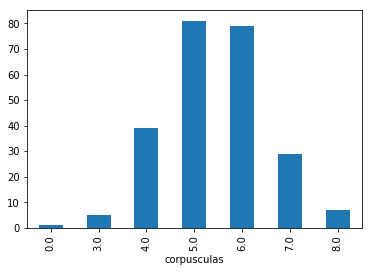

In [ ]:
xs = pd.DataFrame(nuevo)
xs.columns = ['corpusculas']
xs.groupby('corpusculas').size().plot(kind='bar')

____
[Ir a inicio](#beginning)

<a id='part4'></a>
## Discretización Cuantil

##### Proceso:

- Se debe dividir el rango en k intervalos.
- Para la construcción de los intervalos se debe tener en cuenta la discretización por cuantil.
- No se utiliza la información de la clase.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
estq = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [ ]:
nuevoq = estq.fit_transform(bupa_entrenamiento[['media del volúmen corpusculas']])

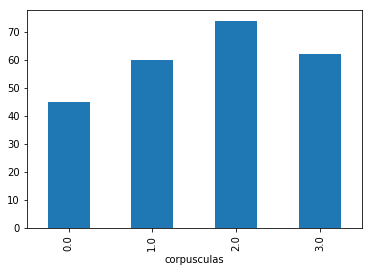

In [ ]:
xq = pd.DataFrame(nuevoq)
xq.columns = ['corpusculas']
xq.groupby('corpusculas').size().plot(kind='bar')

____
[Ir a inicio](#beginning)

<a id='part5'></a>
## Discretización por kmeans

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
estkmeas = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

In [ ]:
nuevokmeas = estkmeas.fit_transform(bupa_entrenamiento[['media del volúmen corpusculas']])

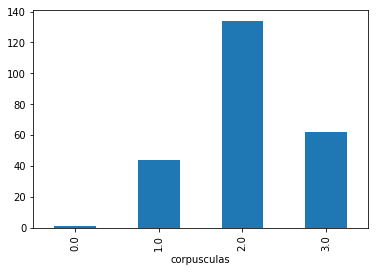

In [ ]:
xkmeans = pd.DataFrame(nuevokmeas)
xkmeans.columns = ['corpusculas']
xkmeans.groupby('corpusculas').size().plot(kind='bar')

____
[Ir a inicio](#beginning)

## Caso practico

Autor: Semeion, Centro de Investigación de Ciencias de la Comunicación, Roma, Italia.

Fuente: [UCI] (http://archive.ics.uci.edu/ml/datasets/steel+plates+faults)

Cite: Conjunto de datos proporcionado por Semeion, Centro de Investigación de Ciencias de la Comunicación, Via Sersale 117, 00128, Roma, Italia.

Conjunto de datos de fallas de placas de acero
Un conjunto de datos de fallas de placas de acero, clasificadas en 7 tipos diferentes. El objetivo era entrenar el aprendizaje automático para el reconocimiento automático de patrones.

El conjunto de datos consta de 27 características que describen cada falla (ubicación, tamaño, ...) y 7 características binarias que indican el tipo de falla (en 7: Pastelería, Z_Scratch, K_Scatch, Manchas, Suciedad, Golpes, Otras Fallas). Este último se usa comúnmente como un objetivo de clasificación binaria (falla 'común' u 'otra').

### Información de atributos
* V1: X_Minimum
* V2: X_Maximum
* V3: Y_Mínimo
* V4: Y_ Máximo
* V5: Pixels_Areas
* V6: X_Perimeter
* V7: Y_Perímetro
* V8: Suma_de_Luminosidad
* V9: Mínimo_de_Luminosidad
* V10: Máxima_de_Luminosidad
* V11: Longitud del transportador
* V12: TypeOfSteel_A300
* V13: TypeOfSteel_A400
* V14: Steel_Plate_Thickness
* V15: Edges_Index
* V16: índice_vacío
* V17: Square_Index
* V18: Outside_X_Index
* V19: Edges_X_Index
* V20: Edges_Y_Index
* V21: Outside_Global_Index
* V22: LogOfAreas
* V23: Log_X_Index
* V24: Log_Y_Index
* V25: Orientation_Index
* V26: Índice de Luminosidad
* V27: SigmoidOfAreas
* V28: pastelería
* V29: Z_Scratch
* V30: K_Scatch
* V31: manchas
* V32: suciedad
* V33: golpes
* Class: Otros_Fallas

### Documentos relevantes
1.M Buscema, S Terzi, W Tastle, A New Meta-Classifier, en NAFIPS 2010, Toronto (CANADÁ), 26-28 de julio de 2010, 978-1-4244-7858-6 / 10 © 2010 IEEE
2.M Buscema, MetaNet: The Theory of Independent Judges, in Substance Use & Maluse, 33 (2), 439-461,1998

In [15]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import KBinsDiscretizer

In [5]:
acero = 'https://raw.githubusercontent.com/Yes197/Miscelanea/master/Ejercicios%20Basico/datos/php9xWOpn.csv'

df_fall_placa_acero = pd.read_csv(acero,  sep=',')

In [6]:
#@title Informacion Acero
df_fall_placa_acero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

Actividad
1. Normalizar solo las variables continuas
2. Crear el dataframe de las variables normalizadas
3. Encontrar el numero de bins con la tecnica de Sturges
4. Discretizacion por intervalos de igual amplitud de la variable "V9" (Grafico de Barras)
5. Discretizacion por cuantil de la variable "V19" (Grafico de barras)
6. Discretizacion por kmeans de la variable "V15" (Grafico de barras)

In [7]:
columns_continuas = ['V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27']

In [8]:
df_fall_placa_acero.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1


In [9]:
#@title 1. Normalizar continuas
#Separando las variables continuas
x_continuas = df_fall_placa_acero.loc[:, columns_continuas].values
x_continuas = (x_continuas - x_continuas.min()) / (x_continuas.max() - x_continuas.min())
x_continuas

array([[0.16962119, 0.20062757, 0.19097144, ..., 0.29390548, 0.11445023,
        0.25573383],
       [0.28525216, 0.22291593, 0.19503122, ..., 0.2898457 , 0.13316404,
        0.20983082],
       [0.31862   , 0.21697991, 0.21547569, ..., 0.26940122, 0.14170414,
        0.19634135],
       ...,
       [0.19605021, 0.21473167, 0.24522046, ..., 0.08347621, 0.1624074 ,
        0.27606509],
       [0.1941578 , 0.25706014, 0.31350888, ..., 0.15176463, 0.1588005 ,
        0.32200045],
       [0.18036101, 0.27124511, 0.29096173, ..., 0.12921748, 0.14314366,
        0.24722609]])

In [19]:
#@title Variable target
#Separando las variable target
y = df_fall_placa_acero.loc[:,['Class']].values
y = pd.DataFrame(y, columns=['Class'])
y.head(5)

,Class
0,1
1,1
2,1
3,1
4,1


In [20]:
np.unique(df_fall_placa_acero.loc[:,['Class']].values)

array([1, 2])

In [10]:
#@title 2. Dataframe Continuas normalizadas
pd_continuas = pd.DataFrame(x_continuas, columns=columns_continuas)
pd_continuas.head(5)

,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
0,0.169621,0.200628,0.190971,0.162327,0.237683,0.323311,0.323311,0.554039,0.307638,0.427393,0.293905,0.114450,0.255734
1,0.285252,0.222916,0.195031,0.162149,0.258613,0.317924,0.323311,0.490457,0.287436,0.398101,0.289846,0.133164,0.209831
2,0.318620,0.216980,0.215476,0.162165,0.282875,0.314803,0.323311,0.461003,0.287436,0.364604,0.269401,0.141704,0.196341
3,0.279429,0.232944,0.186734,0.162407,0.248666,0.323311,0.323311,0.524763,0.298256,0.428962,0.298143,0.136205,0.245867
4,0.172808,0.234125,0.172274,0.163604,0.207388,0.321451,0.323311,0.708553,0.360593,0.551354,0.312603,0.129347,0.323311


In [13]:
#@title 3. Kbins Sturges
n = len(x_continuas)
k = 1 + math.log2(n)
k=round(k,0)
k

12.0

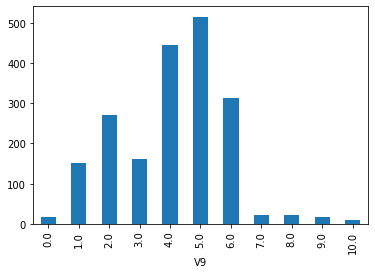

In [21]:
#@title 4. Discretizacion por intervalos V9
est = KBinsDiscretizer(n_bins=11, encode='ordinal', strategy="uniform")
nuevo = est.fit_transform(df_fall_placa_acero[['V9']])
xs = pd.DataFrame(nuevo, columns=['V9'])
xs.groupby('V9').size().plot(kind='bar')

12


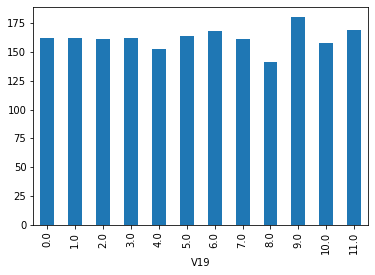

In [17]:
#@title 5. Discretizacion por cuantil "V19"
n19 = len(pd_continuas[['V19']])
k19 = 1 + math.log2(n19)
k19 = int(round(k19,0))
est = KBinsDiscretizer(n_bins=k19, encode='ordinal', strategy="quantile")
nuevo = est.fit_transform(pd_continuas[['V19']])
xs = pd.DataFrame(nuevo, columns=['V19'])
print(k19)
xs.groupby('V19').size().plot(kind='bar')

12


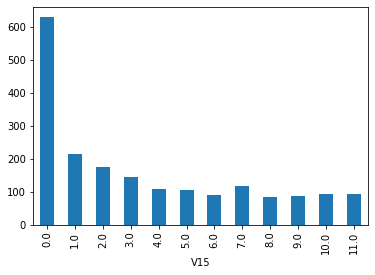

In [18]:
#@title 6. Discretizacion por kmeans "V15"
n15 = len(pd_continuas[['V15']])
k15 = 1 + math.log2(n15)
k15 = int(round(k15,0))
est = KBinsDiscretizer(n_bins=k15, encode='ordinal', strategy="kmeans")
nuevo = est.fit_transform(pd_continuas[['V15']])
xs = pd.DataFrame(nuevo, columns=['V15'])
print(k15)
xs.groupby('V15').size().plot(kind='bar')